Андрей Сенаев РИМ-181228

# Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

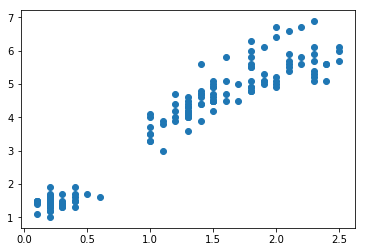

In [22]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)
plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:

$$Err(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.

In [48]:
def squarErr(w0, w1):
    squareDeviationSum = .0;
    for n, a in enumerate(data):
        xi = a[3]
        yi = a[2]
        
        squareDeviation = (yi - (w0 + w1 * xi)) ** 2
        
        squareDeviationSum = squareDeviationSum + squareDeviation
    return squareDeviationSum

2583.0000000000005

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

квадратичное (не средне) отклонение от оси абсцисс 2583.0000000000005


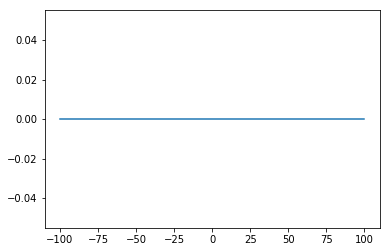

квадратичное (не средне) отклонение от нечетной функции под сорокпять градусов 1147.3600000000004


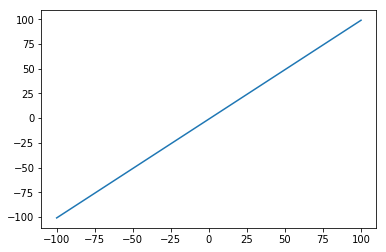

In [122]:
lineFunc = lambda x, w0, w1: w0 + w1 * x

def showLambda (lambdaFunc):
    xpts = np.linspace(-100, 100, 1000)
    test_v = np.vectorize(lambdaFunc)
    plt.plot(xpts, test_v(xpts))
    plt.show()

abscessFunc = lambda x: 0 + 0 * x
otherFunc = lambda x: -1 + 1 * x



print('квадратичное (не средне) отклонение от оси абсцисс', squarErr(0, 0))
showLambda(abscessFunc)

print('квадратичное (не средне) отклонение от нечетной функции под сорокпять градусов', squarErr(0, 1))
showLambda(otherFunc)

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

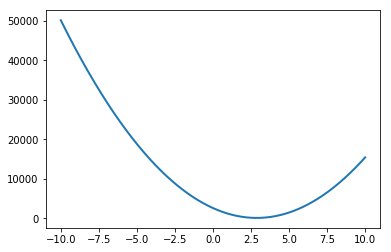

In [123]:
defiationForW1Lambda = lambda x: squarErr(0, x);

deviationsForW1 = np.array([[key / 100, defiationForW1Lambda(key / 100)] for key in range(-1000, 1001)])

plt.plot(deviationsForW1[:,0], deviationsForW1[:,1], linewidth=2.0)
plt.show()

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (0, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [140]:
from scipy.optimize import minimize_scalar

minimize_scalar(defiationForW1Lambda, bounds=(-10, 10))

     fun: 85.1208703274892
    nfev: 10
     nit: 4
 success: True
       x: 2.8745286139596438

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [141]:
from mpl_toolkits.mplot3d import Axes3D

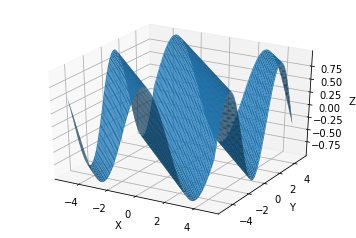

In [142]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y)


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

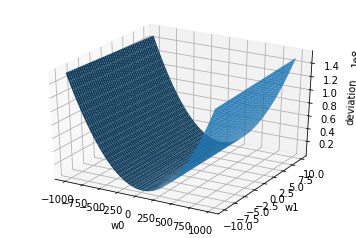

In [145]:
figire = plt.figure()
axis = figire.gca(projection='3d') # get current axis

w0 = np.arange(-1000, 1000, 10)
w1 = np.arange(-10, 10, 0.1)
w0, w1 = np.meshgrid(w0, w1)
deviation = squarErr(w0, w1)


surface = axis.plot_surface(w0, w1, deviation)
axis.set_xlabel('w0')
axis.set_ylabel('w1')
axis.set_zlabel('deviation')
plt.show()

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

w0 minimum 1.0905721871207217
w1 minimum 2.225885276027521


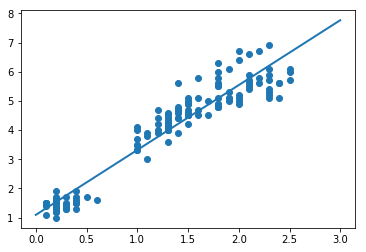

In [164]:
from scipy.optimize import minimize

def calculateSquareError(data):
    return squarErr(data[1], data[0])

[w1min, w0min] = minimize(calculateSquareError, [.0, .0], method='L-BFGS-B', bounds=([-10, 10], [-1000, 1000]))['x']

plt.scatter(x, y)

minFunc = lambda x: w0min + w1min * x;

minFuncValues = np.array([[key / 1000, minFunc(key / 1000)] for key in range(0, 3000)])

plt.plot(minFuncValues[:,0], minFuncValues[:,1], linewidth=2.0)

print('w0 minimum', w0min)
print('w1 minimum', w1min)

plt.show()

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

In [165]:
A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

2.225885306553912 1.0905721458773783
